## Global Power Plant Database

Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database. The database includes the following indicators:

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Task: One is Classification problem - 'Primary Fuel'
and other is Regression problem - 'capacity_mw'

Dataset Link

https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv


## Global Power Plant Project - Classification to predict the 'Primary Fuel' 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
power_plant_df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
power_plant_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
power_plant_df.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
            1. Label (i.e. 'primary_fuel') contains classification data so this is a Classification 
               Problem.

In [4]:
power_plant_df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Observation:
            1. It's Multi-Classification Problem - Coal, Hydro, Solar, Wind, Gas, Biomass, Oil and 
               Nuclear

## Exploratory Data Analysis

In [5]:
power_plant_df.shape

(907, 27)

In [6]:
power_plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
power_plant_df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
power_plant_df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Observation:
            1. There are more Null values in many columns

In [9]:
power_plant_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

## Drop Columns with 0 and 1 unique values

In [10]:
# check the value counts of each column

for i in power_plant_df.columns:
    print(power_plant_df[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

In [11]:
power_plant_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
other_fuel1,3
other_fuel2,1


Observation:
            1. The columns - other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and 
                estimated_generation_gwh - have 0 unique values
            2. The columns - country, country_long, other_fuel2, year_of_capacity_data and 
                generation_data_source - have 1 unique values
            3. 0 and 1 unique values - columns should be removed

In [12]:
power_plant_df.shape

(907, 27)

In [13]:
# 0 unique values - columns should be removed

power_plant_df.drop(['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'], axis = 1, inplace = True)
power_plant_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [14]:
power_plant_df.shape

(907, 22)

In [15]:
# 1 unique values - columns should be removed

power_plant_df.drop(['country', 'country_long', 'other_fuel2', 'year_of_capacity_data', 'generation_data_source'], axis = 1, inplace = True)
power_plant_df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [16]:
power_plant_df.shape

(907, 17)

In [17]:
power_plant_df.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

## Drop Column not needed

In [18]:
# 'name', 'gppd_idnr', 'owner', 'source', 'url' columns not needed for prediction of "primary_fuel'

power_plant_df.drop(['name', 'gppd_idnr', 'owner', 'source', 'url'], axis = 1, inplace = True)
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [19]:
power_plant_df.shape  

(907, 12)

In [20]:
power_plant_df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [21]:
power_plant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2014  398 non-null    float64
 8   generation_gwh_2015  422 non-null    float64
 9   generation_gwh_2016  434 non-null    float64
 10  generation_gwh_2017  440 non-null    float64
 11  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


## Handle Null values

In [22]:
power_plant_df.shape

(907, 12)

In [23]:
power_plant_df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
power_plant_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

Observation:
            1. As the column 'other_fuel1' has 709 NULL values, which is 78% so no need to impute 
               this column and we can remove it
            2. As the column 'generation_gwh_2014' has 509 NULL values, which is 56% so no need to 
               impute this column and we can remove it

In [25]:
# 'other_fuel1', 'generation_gwh_2014' columns not needed for prediction of "primary_fuel' 
#  as it has more number of NULL values

power_plant_df.drop(['other_fuel1', 'generation_gwh_2014'], axis = 1, inplace = True)
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,5916.370,6243.000000,5385.579736,7279.000000


In [26]:
power_plant_df.shape

(907, 10)

In [27]:
power_plant_df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source      19
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [28]:
power_plant_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
geolocation_source      object
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [29]:
# Handle features Null values - Object type

power_plant_df['geolocation_source'] = power_plant_df['geolocation_source'].fillna(power_plant_df['geolocation_source'].mode()[0])

In [30]:
power_plant_df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
geolocation_source       0
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [31]:
# Handle all features Null values  - Float type

for i in power_plant_df.columns:
    if power_plant_df.dtypes[i] == 'float64':
        power_plant_df[i] = power_plant_df[i].fillna(power_plant_df[i].mean())

In [32]:
power_plant_df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Observation:
            1. Now no NULL values

## check for any blank records

In [33]:
for i in power_plant_df.columns:
    print(power_plant_df.loc[power_plant_df[i] == ' '])

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, geolocation_source, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, geolocation_source, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, geolocation_source, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, geolocation_source, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, commissioning_year, geolocation_source, generation_gwh_2015, generation_gwh_2016, generation_g

Observation:
            1. checked all 10 columns but none have any blank values

## Convert for 'commissioning_year' float to int

In [34]:
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997.091082,WRI,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997.091082,WRI,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004.000000,WRI,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.000000,WRI,5916.370000,6243.000000,5385.579736,7279.000000


In [35]:
power_plant_df['commissioning_year'] = power_plant_df['commissioning_year'].astype(int)

In [36]:
power_plant_df['commissioning_year']

0      2011
1      1997
2      1997
3      2004
4      2015
       ... 
902    2016
903    1997
904    1997
905    1997
906    1997
Name: commissioning_year, Length: 907, dtype: int32

In [37]:
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011,National Renewable Energy Laboratory,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,1997,WRI,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,1997,WRI,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,2004,WRI,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015,WRI,5916.370000,6243.000000,5385.579736,7279.000000


In [38]:
power_plant_df['commissioning_year'].value_counts()

1997    388
2015     28
2013     25
2012     23
2016     19
       ... 
1946      1
1956      1
1937      1
1949      1
1953      1
Name: commissioning_year, Length: 73, dtype: int64

## check the duplicate values in rows

In [39]:
power_plant_df.shape

(907, 10)

In [40]:
power_plant_df.duplicated().sum()

1

In [41]:
power_plant_df.shape

(907, 10)

Observation:
            1. Only one duplicate values in the rows, so we can neglect it.

In [42]:
power_plant_df.nunique()

capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
commissioning_year      73
geolocation_source       3
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

In [43]:
power_plant_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.052922,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016438,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.000000,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.000000,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [44]:
power_plant_df.shape

(907, 10)

## Data Visualization

In [45]:
# seperating numerical and categorical columns

cat_col = []
for i in power_plant_df.dtypes.index:
    if power_plant_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in power_plant_df.dtypes.index:
    if power_plant_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['primary_fuel', 'geolocation_source']


Numerical Column ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


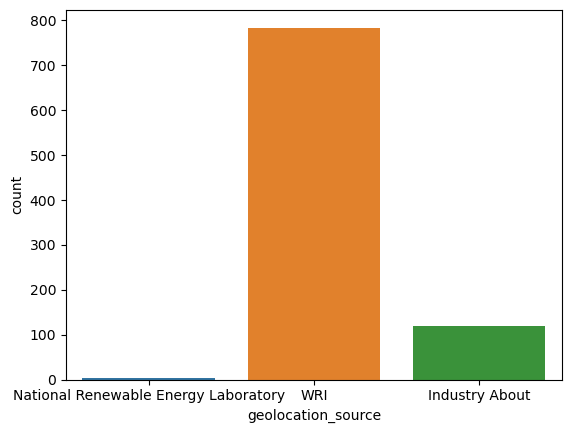

In [46]:
# Univariate Analysis

sns.countplot(x = 'geolocation_source', data = power_plant_df)
print(power_plant_df.geolocation_source.value_counts())

Observation:
            1. There are more WRI type of 'geolocation_source' - 784

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


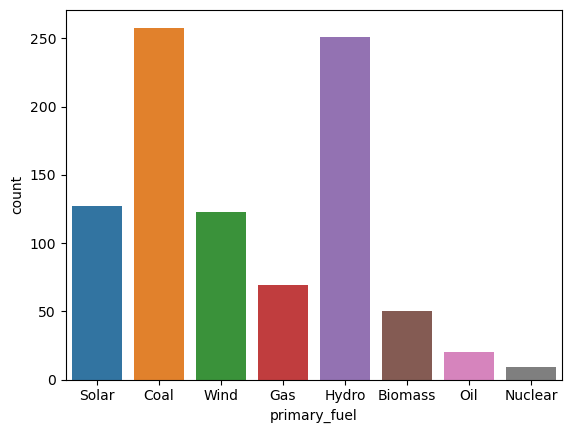

In [47]:
# Univariate Analysis

sns.countplot(x = 'primary_fuel', data = power_plant_df)
print(power_plant_df.primary_fuel.value_counts())

Observation:
            1. There are more number of primary_fuel type - 'Coal' 258 and 'Hydro' 251
            2. Data is Imbalanced, we need to handle this

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


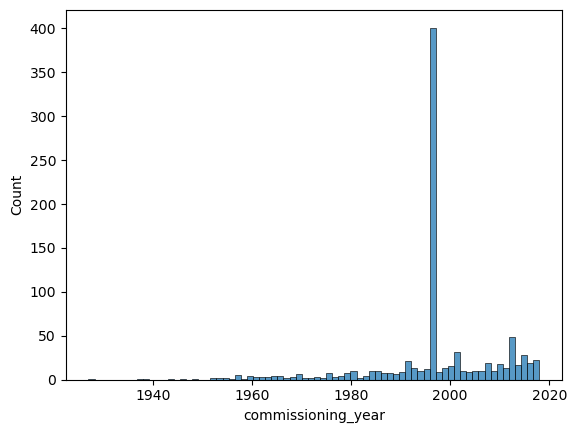

In [48]:
# Univariate Analysis

sns.histplot(x = 'commissioning_year', data = power_plant_df)
print(power_plant_df.primary_fuel.value_counts())

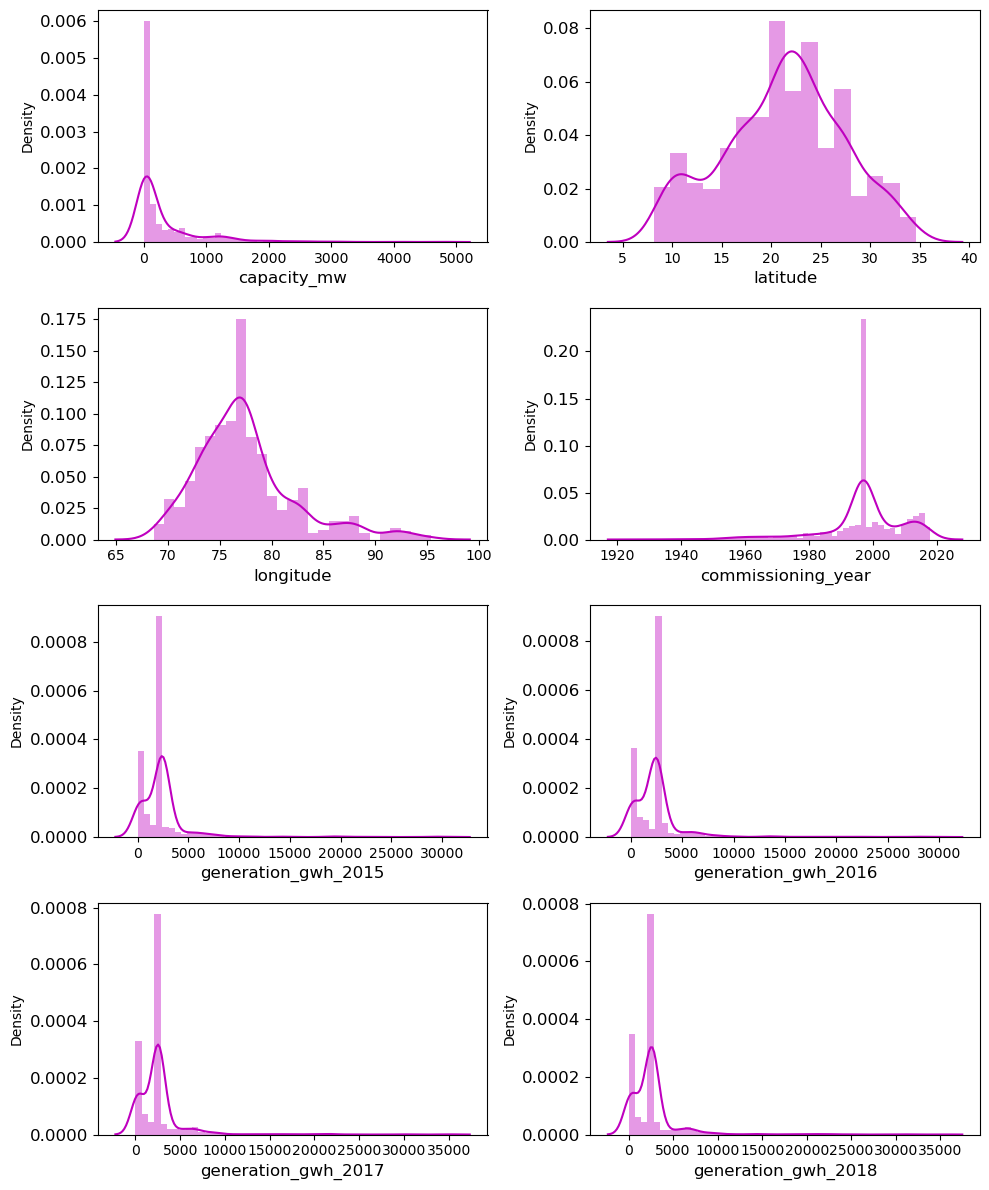

In [49]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10,12))
p = 1
for i in num_col:
    if p <= 8:
        ax = plt.subplot(4, 2, p)
        sns.distplot(power_plant_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. Almost all continuous data are not well normally distributed. 
            2. There are outliers
            3. we need to deal with skewness in the data 

In [50]:
num_col

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

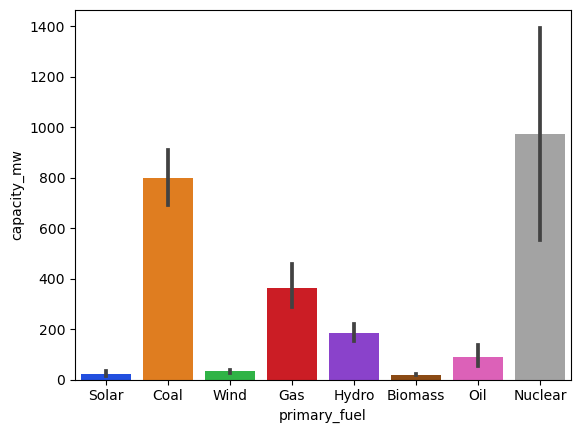

In [52]:
# plot primary_fuel v/s capacity_mw

sns.barplot(x = 'primary_fuel', y = 'capacity_mw', data = power_plant_df, palette = 'bright')

Observation:
            1. The 'Nuclear' type of primary_fuel has more electrical generating capacity in megawatts

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

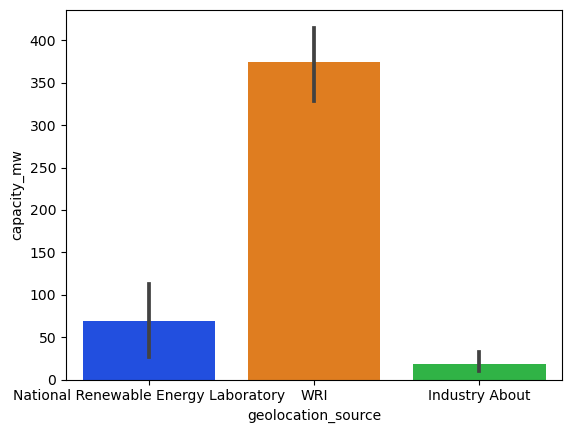

In [53]:
# plot geolocation_source v/s capacity_mw

sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data = power_plant_df, palette = 'bright')

Observation:
            1. The 'WRI' type of geolocation_source has more electrical generating capacity in 
               megawatts

<AxesSubplot:xlabel='geolocation_source', ylabel='generation_gwh_2015'>

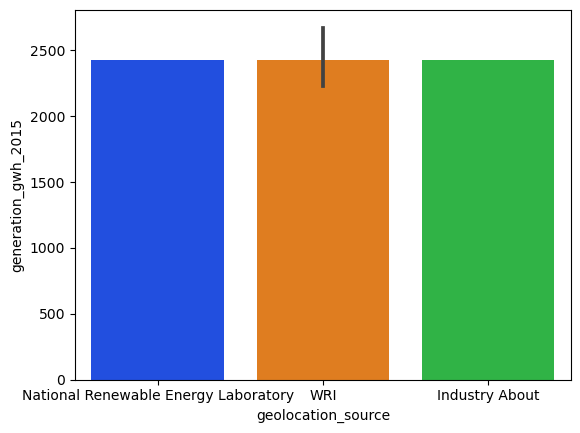

In [54]:
# plot geolocation_source v/s generation_gwh_2015

sns.barplot(x = 'geolocation_source', y = 'generation_gwh_2015', data = power_plant_df, palette = 'bright')

<AxesSubplot:xlabel='geolocation_source', ylabel='generation_gwh_2016'>

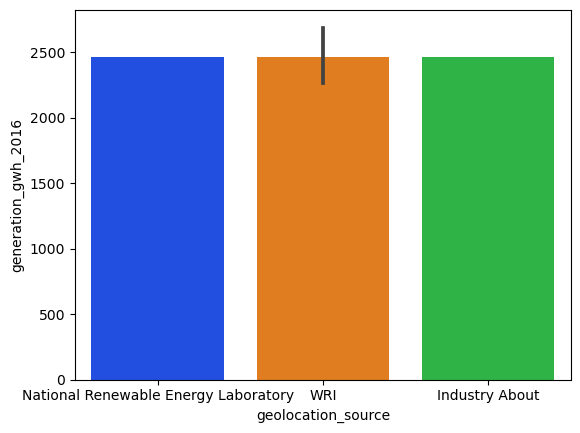

In [55]:
# plot geolocation_source v/s generation_gwh_2016

sns.barplot(x = 'geolocation_source', y = 'generation_gwh_2016', data = power_plant_df, palette = 'bright')

<AxesSubplot:xlabel='geolocation_source', ylabel='generation_gwh_2016'>

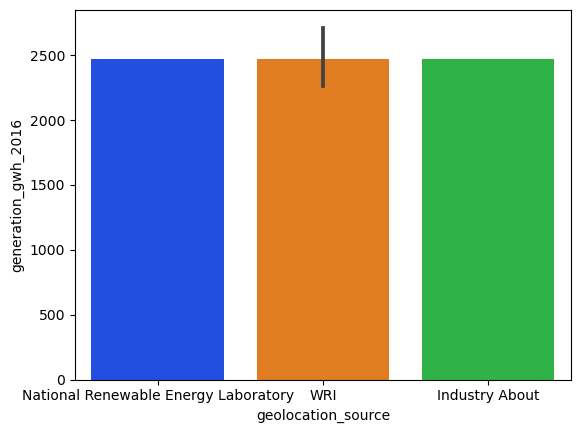

In [56]:
# plot geolocation_source v/s generation_gwh_2016

sns.barplot(x = 'geolocation_source', y = 'generation_gwh_2016', data = power_plant_df, palette = 'bright')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

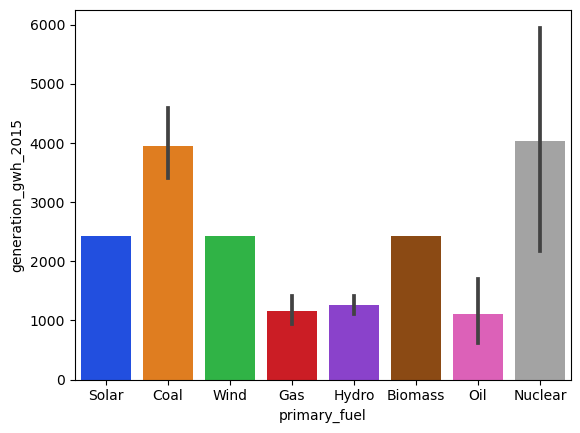

In [57]:
# plot primary_fuel v/s generation_gwh_2015

sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2015', data = power_plant_df, palette = 'bright')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

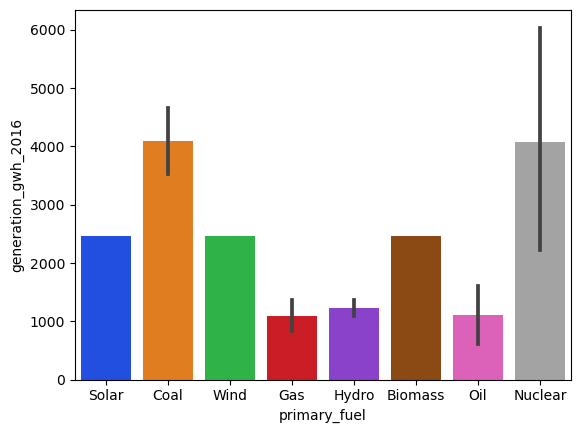

In [58]:
# plot primary_fuel v/s generation_gwh_2016

sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2016', data = power_plant_df, palette = 'bright')

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

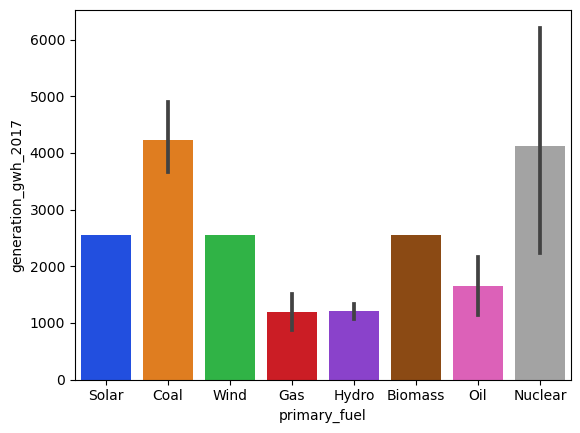

In [59]:
# plot primary_fuel v/s generation_gwh_2017

sns.barplot(x = 'primary_fuel', y = 'generation_gwh_2017', data = power_plant_df, palette = 'bright')

In [60]:
power_plant_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [61]:
power_plant_df.shape

(907, 10)

## Feature Encoding

In [62]:
# Convert Object data type to int type

power_plant_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year       int32
geolocation_source      object
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [64]:
power_plant_df['geolocation_source'] = label_enc.fit_transform(power_plant_df['geolocation_source'])

power_plant_df['primary_fuel'] = label_enc.fit_transform(power_plant_df['primary_fuel'])

In [65]:
power_plant_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year       int32
geolocation_source       int32
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

2    784
0    119
1      4
Name: geolocation_source, dtype: int64


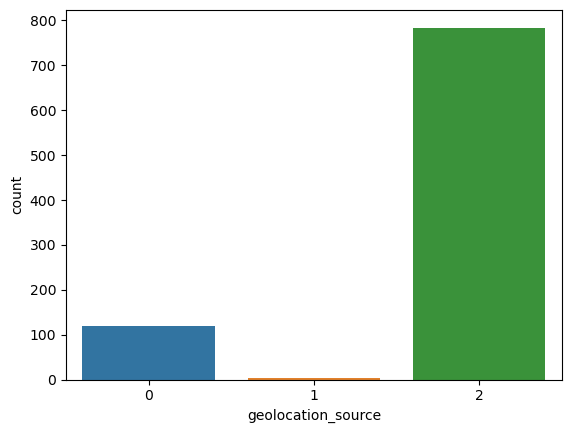

In [66]:
# Univariate Analysis

sns.countplot(x = 'geolocation_source', data = power_plant_df)
print(power_plant_df.geolocation_source.value_counts())

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64


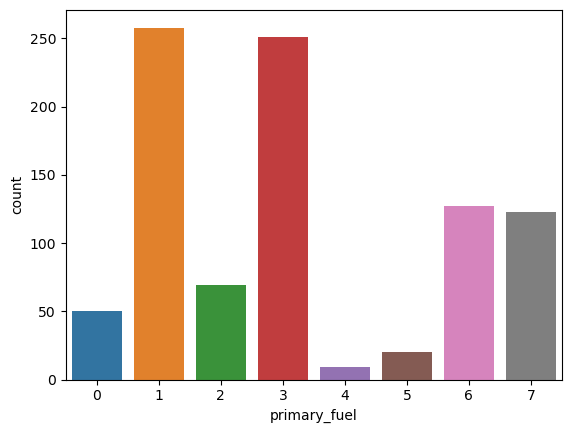

In [67]:
# Univariate Analysis

sns.countplot(x = 'primary_fuel', data = power_plant_df)
print(power_plant_df.primary_fuel.value_counts())

In [68]:
power_plant_df.shape

(907, 10)

## Check for Multicollinearity

## Data Correlation find - whether we need all 12 columns

In [69]:
# get coefficient of one variable with all the other variables

cor = power_plant_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.275711,2.048653e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.102375,-1.842751e-01,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.093778,2.523426e-01,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.128308,-4.832168e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,0.275711,0.102375,0.093778,-0.128308,1.000000,-6.285458e-03,1.473367e-01,1.706430e-01,1.708621e-01,1.743756e-01
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.006285,1.000000e+00,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.147337,-6.339264e-18,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.170643,2.904016e-17,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.170862,8.066490e-17,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01
generation_gwh_2018,0.773456,0.031326,0.037780,-0.136983,0.174376,-1.048582e-17,9.234611e-01,9.571589e-01,9.826888e-01,1.000000e+00


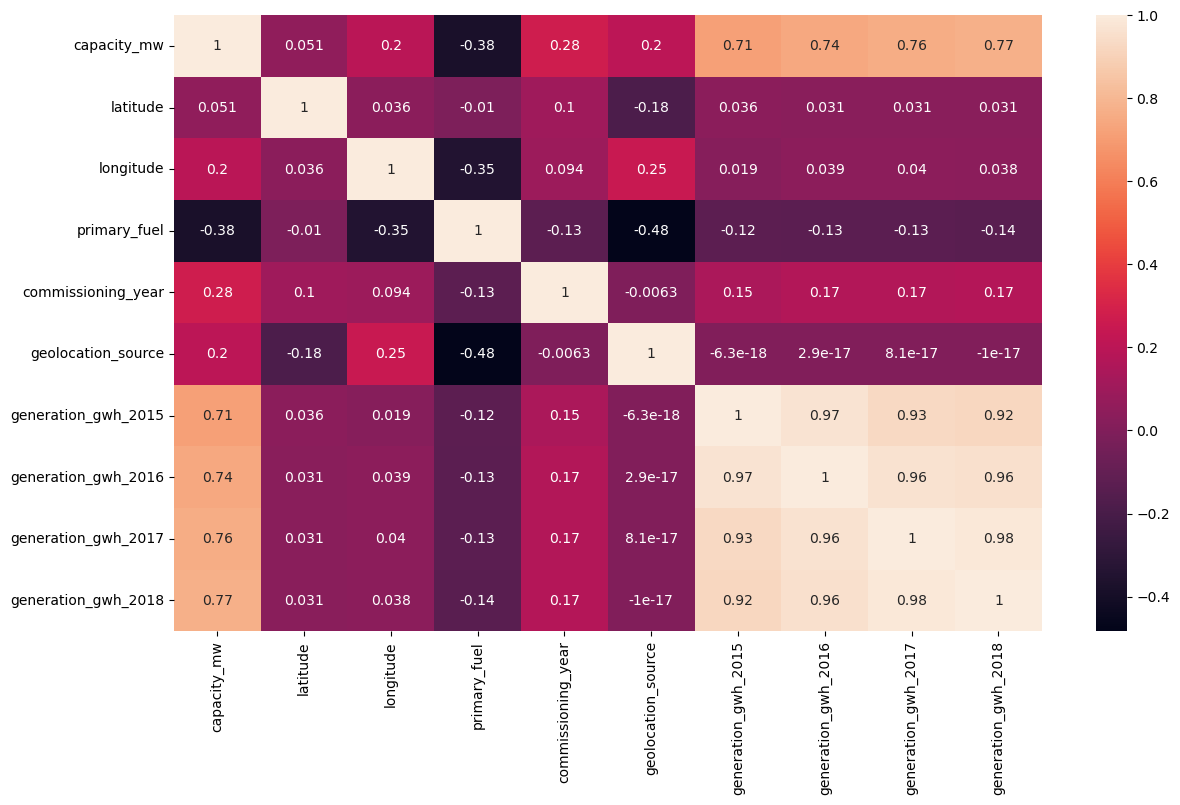

In [70]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'generation_gwh_2017' v/s 'generation_gwh_2018' has more positive 
               correlation 0.98. This shows there might be multicollinearity issue but we need one 
               more proof so will plot scatter plot and check

In [71]:
power_plant_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

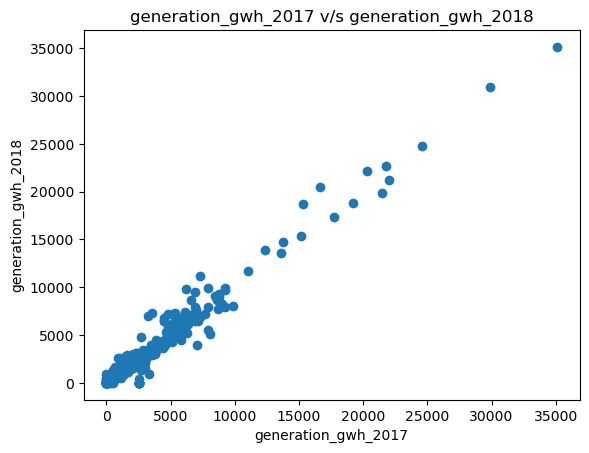

In [72]:
# one more proof so will plot scatter plot and check

plt.scatter(power_plant_df['generation_gwh_2017'], power_plant_df['generation_gwh_2018'])
plt.xlabel("generation_gwh_2017")
plt.ylabel("generation_gwh_2018")
plt.title("generation_gwh_2017 v/s generation_gwh_2018")
plt.show()

Observation:
            1. feature v/s feature - 'generation_gwh_2017' v/s 'generation_gwh_2018' from this scatter 
               plot, we got to know that there is multicollinearity issue between these two features - 
               as 'generation_gwh_2017' increases 'generation_gwh_2017' value increases - positive 
               correlation

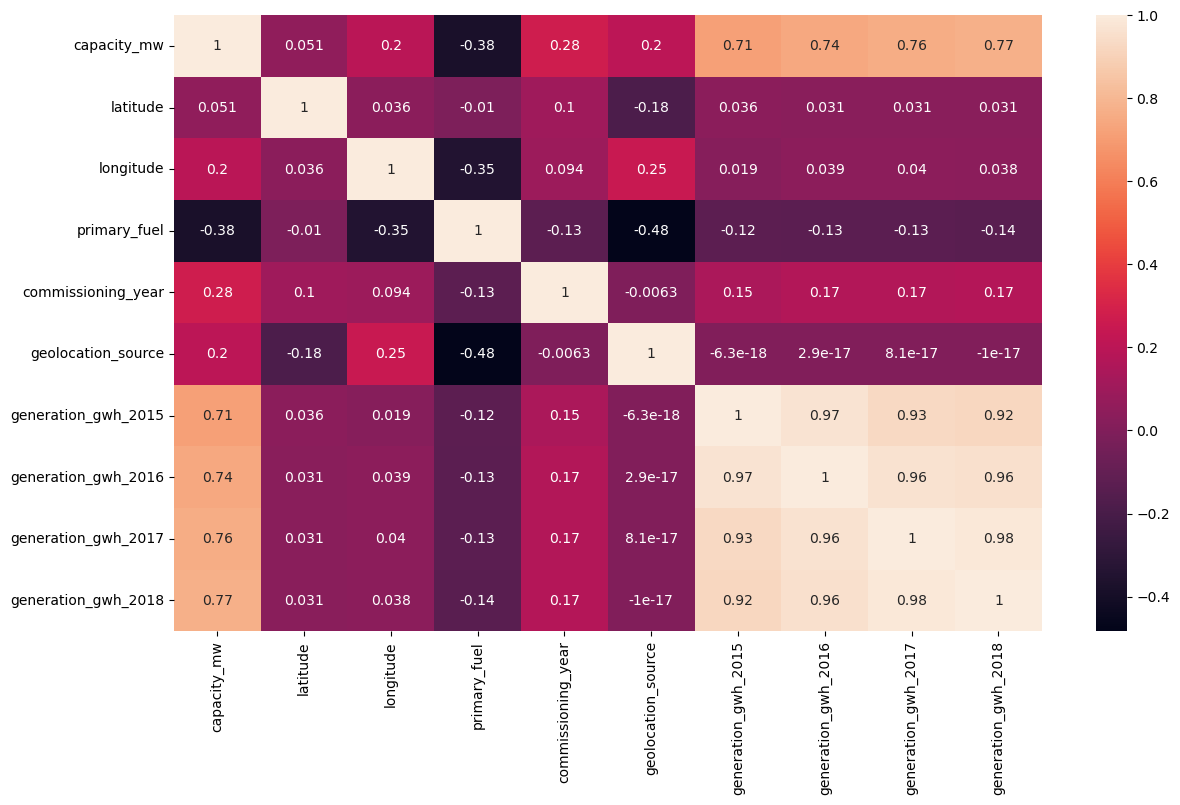

In [73]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'generation_gwh_2017' v/s 'primary_fuel' is -0.13 and 
               'generation_gwh_2018' v/s 'primary_fuel' is -0.14 from this heatmap we get to know 
               'generation_gwh_2018'. but, this number is very small. so ignore it.

## Checking Outliers

In [74]:
power_plant_df.shape

(907, 10)

In [75]:
power_plant_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [76]:
# we dont check outliers for labels and categorical data - so remove it

power_plant_df_features = power_plant_df.drop(['primary_fuel', 'geolocation_source'], axis = 1)

In [77]:
power_plant_df_features.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,2011,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1997,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,1997,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2004,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,2015,5916.370000,6243.000000,5385.579736,7279.000000


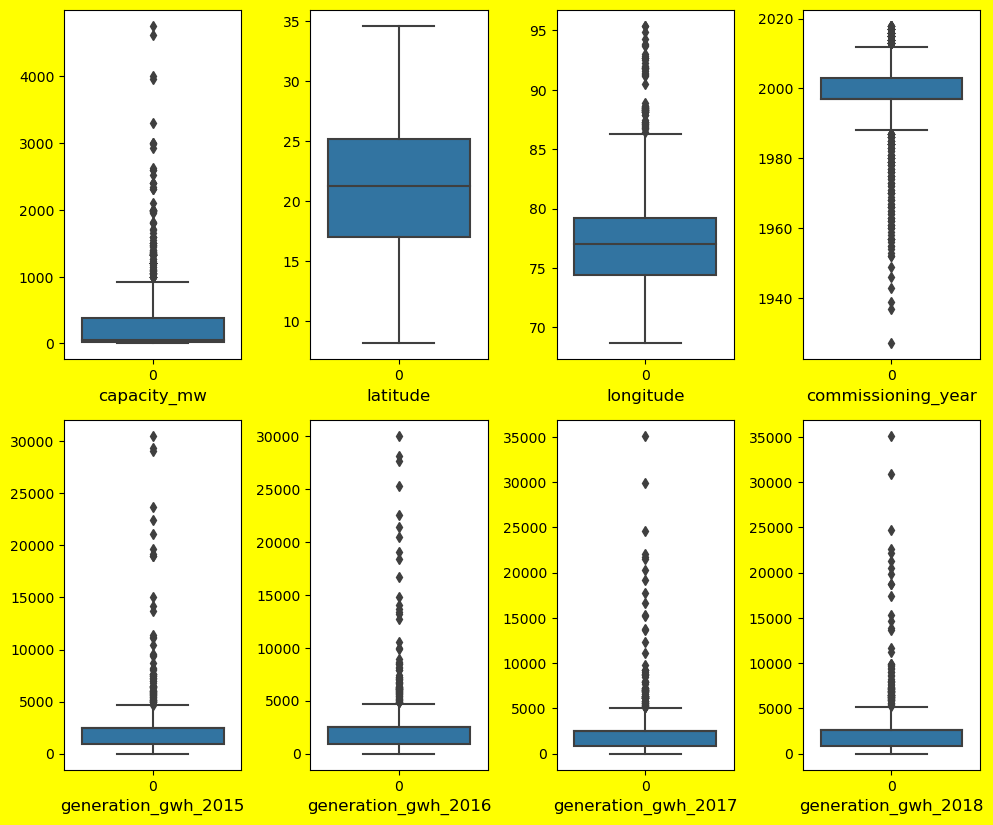

In [78]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in power_plant_df_features:
    if p <= 11:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = power_plant_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features. Most of this outliers are right skewed (i.e. outliers 
               are above max value)
            2. Remove the outliers

In [79]:
power_plant_df_features.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [80]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = power_plant_df.quantile(0.25)
q3 = power_plant_df.quantile(0.75)
iqr = q3 - q1

In [81]:
# validating one outlier

longitude_high = (q3['longitude'] + (1.5 * iqr['longitude']))
longitude_high

# anything > 86.431 outliers

86.43189999999997

In [82]:
# check the index which have the higher values

np_index = np.where(power_plant_df['longitude'] > longitude_high)
np_index

# remove these indexes as they are outliers

(array([  3,  44,  50,  58, 103, 107, 151, 157, 177, 179, 183, 188, 189,
        209, 239, 244, 253, 278, 287, 296, 299, 308, 323, 333, 340, 352,
        360, 367, 388, 416, 427, 454, 455, 471, 472, 480, 499, 519, 529,
        546, 567, 570, 577, 622, 636, 638, 639, 652, 678, 693, 733, 793,
        795, 796, 797, 798, 799, 809, 818, 840, 847, 848], dtype=int64),)

In [83]:
power_plant_df.shape

(907, 10)

In [84]:
power_plant_df = power_plant_df.drop(power_plant_df.index[np_index])

In [85]:
power_plant_df.shape  # 62 rows removed - outliers

(845, 10)

In [86]:
power_plant_df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
4,1800.0,21.9603,82.4091,1,2015,2,5916.370000,6243.000000,5385.579736,7279.000000
5,250.0,23.7689,68.6447,1,2005,2,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016,2,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,1997,0,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,1997,2,2428.226946,2467.936859,2547.759305,2600.804099


In [87]:
power_plant_df.reset_index(inplace = True, drop = True)

In [88]:
power_plant_df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011,1,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
3,1800.0,21.9603,82.4091,1,2015,2,5916.370000,6243.000000,5385.579736,7279.000000
4,250.0,23.7689,68.6447,1,2005,2,1208.852000,1175.765000,1147.913000,976.655000
...,...,...,...,...,...,...,...,...,...,...
840,1600.0,16.2949,77.3568,1,2016,2,0.994875,233.596650,865.400000,686.500000
841,3.0,12.8932,78.1654,6,1997,0,2428.226946,2467.936859,2547.759305,2600.804099
842,25.5,15.2758,75.5811,7,1997,2,2428.226946,2467.936859,2547.759305,2600.804099
843,80.0,24.3500,73.7477,1,1997,2,2428.226946,2467.936859,2547.759305,2600.804099


In [89]:
power_plant_df.shape

(845, 10)

## Checking for Skewness

In [90]:
power_plant_df.skew() # not in the range -0.5 to +0.5

capacity_mw            3.195943
latitude              -0.045662
longitude              0.296790
primary_fuel           0.407931
commissioning_year    -1.474956
geolocation_source    -2.068726
generation_gwh_2015    5.516608
generation_gwh_2016    5.243056
generation_gwh_2017    5.309170
generation_gwh_2018    5.116175
dtype: float64

In [91]:
# removing for skewness

power_plant_df['generation_gwh_2015'] = np.cbrt(power_plant_df['generation_gwh_2015'])

power_plant_df['generation_gwh_2016'] = np.cbrt(power_plant_df['generation_gwh_2016'])

power_plant_df['generation_gwh_2017'] = np.cbrt(power_plant_df['generation_gwh_2017'])

power_plant_df['generation_gwh_2018'] = np.cbrt(power_plant_df['generation_gwh_2018'])

In [92]:
power_plant_df.skew() # not in the range -0.5 to +0.5

capacity_mw            3.195943
latitude              -0.045662
longitude              0.296790
primary_fuel           0.407931
commissioning_year    -1.474956
geolocation_source    -2.068726
generation_gwh_2015   -0.323062
generation_gwh_2016   -0.330237
generation_gwh_2017   -0.395713
generation_gwh_2018   -0.385333
dtype: float64

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [93]:
power_plant_df.shape

(845, 10)

In [94]:
x = power_plant_df.drop(columns = ['primary_fuel'])
y = power_plant_df['primary_fuel']

In [95]:
x.shape

(845, 9)

In [96]:
y.shape

(845,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [97]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[-0.53675379,  1.1756721 , -0.94597192, ...,  0.32396563,
         0.31629356,  0.32240976],
       [-0.37594351,  0.62207853, -0.55568818, ...,  0.32396563,
         0.31629356,  0.32240976],
       [-0.47495549,  0.15840179, -2.04910895, ...,  0.32396563,
         0.31629356,  0.32240976],
       ...,
       [-0.49802461, -0.91522246, -0.27841358, ...,  0.32396563,
         0.31629356,  0.32240976],
       [-0.4062533 ,  0.55464495, -0.801359  , ...,  0.32396563,
         0.31629356,  0.32240976],
       [-0.51317951, -1.78043919,  0.26230183, ...,  0.32396563,
         0.31629356,  0.32240976]])

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.620336,capacity_mw
1,1.075446,latitude
2,1.198833,longitude
3,1.107745,commissioning_year
4,1.223460,geolocation_source
5,6.372540,generation_gwh_2015
6,12.813317,generation_gwh_2016
7,9.899728,generation_gwh_2017
8,10.753864,generation_gwh_2018


Observation: 
            1. The threshold VIF value is 10 and any feature > 10 VIF value has high correlation with 
               other features. Here we can observe some features are > threshold value. 
               so there might be still multicollinearity problem. Hence, we can remove the features 
               generation_gwh_2016

In [99]:
# remove the feature 'generation_gwh_2016'

power_plant_df.drop(['generation_gwh_2016'], axis = 1, inplace = True)
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011,1,13.440944,13.657969,13.752106
1,98.0,24.7663,74.6090,1,1997,2,13.440944,13.657969,13.752106
2,39.2,21.9038,69.3732,7,1997,2,13.440944,13.657969,13.752106
3,1800.0,21.9603,82.4091,1,2015,2,18.086385,17.528476,19.380155
4,250.0,23.7689,68.6447,1,2005,2,10.652651,10.470554,9.921570


In [100]:
power_plant_df.shape

(845, 9)

## Modelling

In [101]:
power_plant_df.shape

(845, 9)

In [102]:
x = power_plant_df.drop(columns = ['primary_fuel'])
y = power_plant_df['primary_fuel']

In [103]:
x.shape

(845, 8)

In [104]:
y.shape

(845,)

## Data Imbalance use Oversampling method

In [105]:
y.value_counts()

1    238
3    220
6    125
7    123
2     60
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Observation:
            1. Data is imbalanced so use oversampling method

In [107]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3)
x1, y1 = over_samp.fit_resample(x, y)

In [108]:
y1.value_counts()

6    238
1    238
7    238
3    238
2    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

Observation:
            1. Now the data is balanced

## Split the data in to training and testing sets

In [109]:
x1.shape

(1904, 8)

In [110]:
y1.shape

(1904,)

In [111]:
train_per = 0.8

In [112]:
train_samples = int(len(x1) * train_per)

In [113]:
x_train, y_train = x1[:train_samples], y1[:train_samples]

In [114]:
x_test, y_test = x1[train_samples:], y1[train_samples:]

In [115]:
x_train.shape

(1523, 8)

In [116]:
y_train.shape

(1523,)

In [117]:
x_test.shape

(381, 8)

In [118]:
y_test.shape

(381,)

## Decision Tree Classifier

## Cross Validation - KFold - Decision Tree Classifier

In [151]:
from sklearn.model_selection import KFold

In [152]:
kfold = KFold(n_splits = 5, shuffle = True)

In [153]:
model_DT = DecisionTreeClassifier()

In [154]:
scores1 = cross_val_score(model_DT, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores1

array([0.84918033, 0.84918033, 0.79344262, 0.81907895, 0.82565789])

In [155]:
print(np.mean(scores1))  # Cross Validation mean score

0.8273080241587577


In [156]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [157]:
DT_test_acc = model_DT.score(x_test, y_test)
print(DT_test_acc)

0.9028871391076115


Observation:
            1. Decision Tree model with kfold cross validation - 90.28%

## Random Forest Tree Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

## Cross Validation - KFold - Random Forest Tree Classifier

In [159]:
kfold = KFold(n_splits = 5, shuffle = True)

In [160]:
random_clf = RandomForestClassifier()

In [161]:
scores2 = cross_val_score(random_clf, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores2

array([0.89508197, 0.89836066, 0.85901639, 0.91447368, 0.89473684])

In [162]:
print(np.mean(scores2))

0.8923339085418464


In [163]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [164]:
random_clf_test_acc = random_clf.score(x_test, y_test)
print(random_clf_test_acc)

0.9028871391076115


Observation:
            1. Random Forest Tree model with kfold cross validation - 90.28%

## Extra Tree Classifier

In [165]:
from sklearn.ensemble import ExtraTreesClassifier

## Cross Validation - Stratified KFold - Extra Tree Classifier

In [166]:
kfold = KFold(n_splits = 5, shuffle = True)

In [167]:
ETC = ExtraTreesClassifier()

In [168]:
scores3 = cross_val_score(ETC, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores3

array([0.91803279, 0.87868852, 0.91147541, 0.93421053, 0.875     ])

In [170]:
print(np.mean(scores3))

0.903481449525453


In [171]:
ETC.fit(x_train, y_train)

ExtraTreesClassifier()

In [172]:
ETC_test_acc = ETC.score(x_test, y_test)
print(ETC_test_acc)

0.8976377952755905


In [ ]:
Observation:
            1. Extra Tree model with kfold cross validation - 89.76%

## KNN Classifier

In [177]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x_train)
x_scaled_1

array([[-0.62897939,  1.46143769, -1.02977317, ...,  0.33970843,
         0.36236388,  0.38838106],
       [-0.46067922,  0.85672107, -0.57150068, ...,  0.33970843,
         0.36236388,  0.38838106],
       [-0.56430278,  0.3502249 , -2.32508039, ...,  0.33970843,
         0.36236388,  0.38838106],
       ...,
       [-0.59461443, -0.13113991, -1.11035292, ...,  0.33970843,
         0.36236388,  0.38838106],
       [-0.59378554, -0.14884476, -1.10431994, ...,  0.33970843,
         0.36236388,  0.38838106],
       [-0.56950572,  0.22532482,  0.3850028 , ..., -2.50388018,
        -2.35895739, -2.2612042 ]])

## Cross Validation - Stratified KFold - KNN Classifier

In [178]:
kfold = KFold(n_splits = 5, shuffle = True)

In [179]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [180]:
scores4 = cross_val_score(knn, x_scaled_1, y_train, cv = kfold, scoring = 'accuracy')
scores4

array([0.86557377, 0.81967213, 0.83278689, 0.80921053, 0.81907895])

In [181]:
print(np.mean(scores4))

0.8292644521138912


In [182]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [183]:
knn_test_acc = knn.score(x_test, y_test)
print(knn_test_acc)

0.7559055118110236


In [ ]:
Observation:
            1. KNN model with kfold cross validation - 75.59%

In [ ]:
Observation:
            1. Random Forest Tree and Extra Tree model with kfold cross validation - 90.28%. We can 
               choose any

## HyperParameter Tuning for Random Forest Tree model as its accuracy is better 90.28%

In [186]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [50, 100, 1000], 'max_depth': [0, 10, 20],
             'n_jobs': [-2, -1, 1], 'n_estimators': [50, 100, 200, 300]}

In [187]:
kfold = KFold(n_splits = 5, shuffle = True)

In [188]:
grid_search = GridSearchCV(estimator = random_clf, param_grid = parameters, scoring = 'accuracy', cv = kfold)

In [195]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [50, 100, 1000]},
             scoring='accuracy')

In [190]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

## Retrain the model with the hyperparameters

In [192]:
random_clf_final_model = RandomForestClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2,
 random_state = 50)

In [198]:
random_clf_final_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-2,
                       random_state=50)

In [199]:
grid_search.best_score_

0.8995405522001725

In [200]:
random_clf_final_model_test_acc = random_clf_final_model.score(x_test, y_test)
print(random_clf_final_model_test_acc)

0.8923884514435696


Observation:
            1. Random Forest Tree model with hypertuning - accuracy -  89.23%
            2. Random Forest Tree model without hypertuning - accuracy - 90.28%
            3. We will choose Random Forest Tree model without hypertuning for prediction of the data

## Save the Model

In [201]:
# use Random Forest Tree Classifier and the save the model

import pickle
pickle.dump(random_clf, open('Global_Power_Plant_Classification_Model.pkl', 'wb'))

## prediction using the saved model

In [202]:
loaded_model = pickle.load(open('Global_Power_Plant_Classification_Model.pkl', 'rb'))

In [203]:
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([5, 5, 3, 5, 5, 2, 5, 5, 5, 3, 5, 5, 2, 5, 1, 5, 5, 5, 1, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 7, 5, 5, 5, 1, 3, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 3, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 3, 5, 5, 3, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 1, 0, 7, 7,

In [205]:
print(y_test)

1523    5
1524    5
1525    5
1526    5
1527    5
       ..
1899    7
1900    7
1901    7
1902    7
1903    7
Name: primary_fuel, Length: 381, dtype: int32


In [204]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,5,5
1,5,5
2,3,5
3,5,5
4,5,5
...,...,...
376,7,7
377,7,7
378,7,7
379,7,7


Observation:
            1. Almost all actual and predicted values match
            2. This Global_Power_Plant_Classification_Model.pkl can be used to predict the 
               primary_fuel

Observation:
            1. Decision Tree Classifier - accuracy                    -  90.28%
            2. Random Forest Classifier - accuracy                    -  90.28%
            3. Extra Tree Classifier    - accuracy                    -  89.76%
            4. Random Forest Tree Classifier with hypertuning - accuracy - 89.23%
            4. KNN Classifier - accuracy                              - 75.59%
            5. Comparing all the Classifiers - Random Forest Tree Classifier without hypertuning has 
               the good accuracy and our model is also free from overfitting/underfitting problem

## Global Power Plant Project - Regression to find the 'capacity_mw'

## Seperating Features and Target

In [206]:
power_plant_df.shape

(845, 9)

In [207]:
power_plant_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2015,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011,1,13.440944,13.657969,13.752106
1,98.0,24.7663,74.6090,1,1997,2,13.440944,13.657969,13.752106
2,39.2,21.9038,69.3732,7,1997,2,13.440944,13.657969,13.752106
3,1800.0,21.9603,82.4091,1,2015,2,18.086385,17.528476,19.380155
4,250.0,23.7689,68.6447,1,2005,2,10.652651,10.470554,9.921570


Observation:
            1. Predict 'capacity_mw' electrical generating capacity in megawatts is a continous data
               so this is a Regression problem.

In [208]:
power_plant_df['capacity_mw'].value_counts()

5.0       38
10.0      22
15.0      19
600.0     19
1.0       18
          ..
96.0       1
17.5       1
445.0      1
1458.0     1
106.6      1
Name: capacity_mw, Length: 348, dtype: int64

In [209]:
x2 = power_plant_df.drop(columns = ['capacity_mw'])
y2 = power_plant_df['capacity_mw']

In [210]:
x2.shape

(845, 8)

In [211]:
y2.shape

(845,)

In [213]:
train_per = 0.8

In [214]:
train_samples = int(len(x2) * train_per)

In [215]:
x_train2, y_train2 = x2[:train_samples], y2[:train_samples]

In [216]:
x_test2, y_test2 = x2[train_samples:], y2[train_samples:]

In [217]:
x_train2.shape

(676, 8)

In [218]:
y_train2.shape

(676,)

In [219]:
x_test2.shape

(169, 8)

In [220]:
y_test2.shape

(169,)

In [221]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x_train2)
x_scaled_1

array([[ 1.12192885, -0.93083023,  1.23631693, ...,  0.35005444,
         0.34968363,  0.35428984],
       [ 0.56831415, -0.53692138, -0.94922241, ...,  0.35005444,
         0.34968363,  0.35428984],
       [ 0.10461972, -2.04421361,  1.67342479, ...,  0.35005444,
         0.34968363,  0.35428984],
       ...,
       [-0.39213673,  0.89264274, -0.94922241, ..., -2.361289  ,
         1.84985457,  1.67751347],
       [ 0.46091523,  1.79428896, -0.94922241, ...,  2.8080105 ,
         2.49537137,  2.44113527],
       [-0.42069545,  0.46450472, -0.07500668, ...,  0.35005444,
         0.34968363,  0.35428984]])

## Modelling

## Linear Regression

## We select KFold cross validation 

In [223]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [224]:
kfold = KFold(n_splits = 5, shuffle = True)

In [225]:
model_LR = LinearRegression()

In [227]:
LR_scores1 = cross_val_score(model_LR, x_scaled_1, y_train2, cv = kfold, scoring = 'r2')
LR_scores1

array([0.35391271, 0.26185618, 0.3817671 , 0.34175617, 0.39437899])

In [228]:
print(np.mean(LR_scores1)) 

0.3467342291701477


In [230]:
model_LR.fit(x_train2, y_train2)

LinearRegression()

In [231]:
LR_test_acc = model_LR.score(x_test2, y_test2)
print(LR_test_acc)

0.49492935560196194


In [232]:
y_pred_LR = model_LR.predict(x_test2)
y_pred_LR

array([ 1.59652368e+03,  4.46667722e+02, -4.86174584e+02,  6.46050551e+02,
        5.53674097e+02,  4.64192539e+02,  4.43041187e+02,  5.06873967e+02,
        6.38937391e+01,  2.36559232e+02,  4.50042880e+02,  7.38873459e+02,
        6.47146316e+01,  7.07252820e+02,  4.35990736e+02,  5.47867524e+02,
        7.70955732e+02, -2.29056654e+02,  3.58697899e+02,  1.51055882e+02,
        6.59060736e+02,  2.16701565e+02,  2.16504447e+02,  2.16760181e+02,
        2.54022246e+02,  2.54272538e+02,  2.18602176e+02,  1.95702847e+01,
        1.87583080e+01,  9.04644309e+01,  1.52923456e+02, -6.93118703e+01,
        4.18773318e+01,  5.75143439e+01, -6.94141063e+01, -6.94743786e+01,
       -6.92259207e+01,  1.63051783e+02,  1.71933869e+02,  1.65382958e+02,
        8.76773142e+02,  2.46138314e+02,  8.11714258e+01,  2.60845747e+02,
       -3.31415215e+01,  1.08315104e+02,  2.60845747e+02,  2.60845747e+02,
        2.60845747e+02,  2.60845747e+02,  9.36035655e+01,  8.78207498e+01,
        8.35456532e+00,  

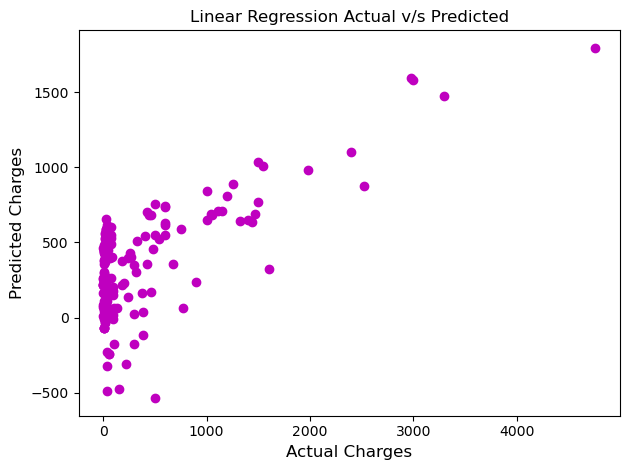

In [233]:
plt.scatter(y_test2, y_pred_LR, color = 'm')
plt.xlabel("Actual Charges", fontsize = 12)
plt.ylabel('Predicted Charges', fontsize = 12)
plt.title("Linear Regression Actual v/s Predicted")
plt.tight_layout()

Observation:
            1. we are able to see only few number of samples are following linear curve

In [234]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [235]:
print("r2_score on test data ", r2_score(y_test2, y_pred_LR) * 100)

print("MAE ", mean_absolute_error(y_test2, y_pred_LR))

print("MSE ", mean_squared_error(y_test2, y_pred_LR))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, y_pred_LR)))

r2_score on test data  49.492935560196194
MAE  329.8968505838357
MSE  242377.52055979887
RMSE  492.31851535342327


Observation:
            1. Linear Regression model with kfold cross validation - 49.49%

## Random Forest Regression

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
kfold = KFold(n_splits = 5, shuffle = True)

In [241]:
RFR = RandomForestRegressor()

In [242]:
RF_scores1 = cross_val_score(RFR, x_train2, y_train2, cv = kfold, scoring = 'r2')
RF_scores1

array([0.94244141, 0.8677782 , 0.75364507, 0.84503557, 0.84471843])

In [243]:
print(np.mean(RF_scores1)) 

0.8507237355954631


In [244]:
RFR.fit(x_train2, y_train2)

RandomForestRegressor()

In [292]:
RFR_test_acc = RFR.score(x_test2, y_test2)
print(RFR_test_acc)

0.8826537354082403


In [246]:
pred_RFR = RFR.predict(x_test2)
pred_RFR

array([3.62950000e+03, 3.77015200e+02, 7.37708000e+01, 5.80307200e+02,
       1.71862000e+01, 1.25846667e+01, 7.99400000e+00, 4.05000060e+02,
       2.47989700e+02, 2.90231740e+02, 1.67755000e+01, 6.79705140e+02,
       2.74165500e+02, 1.21732880e+03, 1.49500000e+01, 7.88235800e+02,
       1.22600400e+03, 3.62810000e+01, 5.02646667e+01, 1.55984600e+02,
       4.98994700e+02, 1.92305000e+01, 2.42430000e+01, 4.70405000e+01,
       5.96860000e+01, 5.96860000e+01, 1.73416667e+01, 7.02900000e+00,
       7.00700000e+00, 9.50500000e+00, 2.18180000e+01, 3.99420000e+01,
       9.46900000e+00, 2.99243000e+01, 1.01860000e+01, 9.66600000e+00,
       1.18260000e+01, 4.32015000e+01, 3.80635000e+01, 1.75800000e+01,
       1.58355360e+03, 9.09620000e+01, 1.11092900e+02, 3.72551098e+01,
       4.53810000e+01, 3.86070000e+01, 3.72551098e+01, 3.72551098e+01,
       3.72551098e+01, 3.72551098e+01, 3.45240000e+01, 3.28015000e+01,
       6.32300000e+00, 2.32415000e+01, 4.16600000e+01, 3.59740000e+01,
      

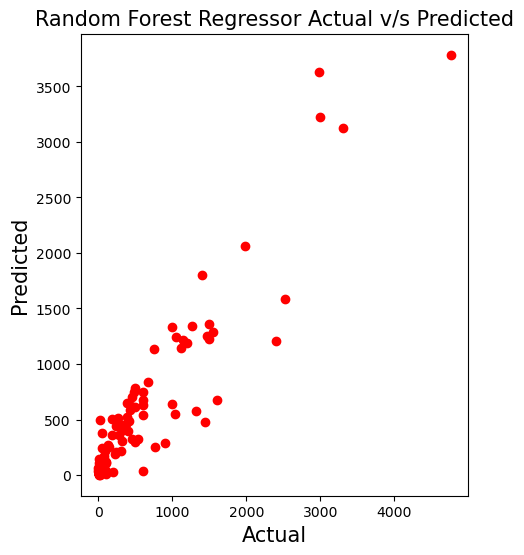

In [247]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see more number of samples are following linear curve

In [248]:
print("r2_score on test data ", r2_score(y_test2, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_RFR))

print("MSE ", mean_squared_error(y_test2, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_RFR)))

r2_score on test data  88.26537354082403
MAE  119.40492318143397
MSE  56313.10584800108
RMSE  237.3038260289983


In [ ]:
Observation:
            1. Random Forest Regressor model with kfold cross validation - 88.26%

## Ridge Regression

In [253]:
from sklearn.linear_model import Ridge

In [254]:
kfold = KFold(n_splits = 5, shuffle = True)

In [255]:
ridge = Ridge()

In [263]:
ridge_scores1 = cross_val_score(ridge, x_scaled_1, y_train2, cv = kfold, scoring = 'r2')
ridge_scores1

array([0.36419664, 0.41818125, 0.03852914, 0.26410412, 0.43964697])

In [264]:
print(np.mean(ridge_scores1))

0.3049316247337927


In [265]:
ridge.fit(x_train2, y_train2)

Ridge()

In [266]:
ridge_test_acc = ridge.score(x_test2, y_test2)
print(ridge_test_acc)

0.49492092762407736


In [267]:
pred_ridge = ridge.predict(x_test2)
pred_ridge

array([ 1.59639267e+03,  4.46757676e+02, -4.86101431e+02,  6.45915531e+02,
        5.53677744e+02,  4.64068425e+02,  4.42919027e+02,  5.06683491e+02,
        6.38931121e+01,  2.36533103e+02,  4.49799144e+02,  7.38939306e+02,
        6.47418796e+01,  7.07078018e+02,  4.35869228e+02,  5.47776072e+02,
        7.70763147e+02, -2.28971202e+02,  3.58540045e+02,  1.51161150e+02,
        6.59058241e+02,  2.16520506e+02,  2.16300124e+02,  2.16576177e+02,
        2.54728098e+02,  2.54978472e+02,  2.18397408e+02,  2.01794714e+01,
        1.93670131e+01,  9.09982719e+01,  1.52619305e+02, -6.87348665e+01,
        4.25368887e+01,  5.82405550e+01, -6.88666857e+01, -6.89272668e+01,
       -6.86785060e+01,  1.62721325e+02,  1.71636485e+02,  1.65079853e+02,
        8.76665499e+02,  2.46801653e+02,  8.19360188e+01,  2.60538219e+02,
       -3.25861929e+01,  1.07877372e+02,  2.60538219e+02,  2.60538219e+02,
        2.60538219e+02,  2.60538219e+02,  9.32061505e+01,  8.74241816e+01,
        8.99133317e+00,  

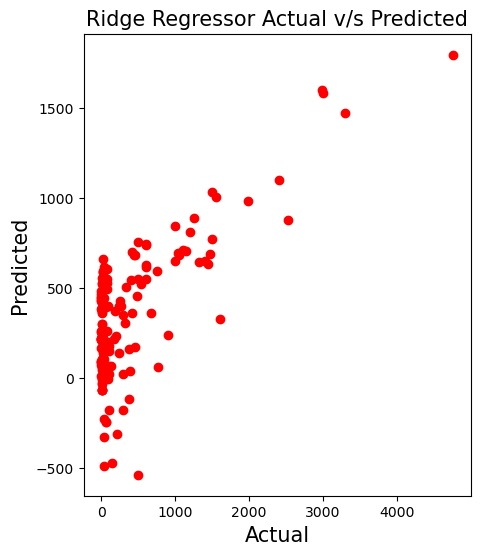

In [268]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see some number of samples are following linear curve

In [269]:
print("r2_score on test data ", r2_score(y_test2, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_ridge))

print("MSE ", mean_squared_error(y_test2, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_ridge)))

r2_score on test data  49.49209276240774
MAE  329.84453546771914
MSE  242381.56504823954
RMSE  492.3226229295578


Observation:
            1. Linear Regression model with kfold cross validation - 49.49%
            2. Ridge Regression model with kfold cross validation - 49.49%
            3. both have same values so there is no overfitting 

## XGBoost Regressor

In [270]:
!pip install xgboost

In [271]:
kfold = KFold(n_splits = 5, shuffle = True)

In [272]:
import xgboost as xgb

xg = xgb.XGBRegressor()

In [273]:
xg_scores1 = cross_val_score(xg, x_train2, y_train2, cv = kfold, scoring = 'r2')
xg_scores1

array([0.76361244, 0.76060167, 0.75612576, 0.84262909, 0.9089371 ])

In [274]:
print(np.mean(xg_scores1))  

0.8063812116668119


In [275]:
xg.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [276]:
xg_test_acc = xg.score(x_test2, y_test2)
print(xg_test_acc)

0.8378715943853516


In [277]:
pred_xg = xg.predict(x_test2)
pred_xg

array([ 3.9335569e+03,  4.7993552e+02,  7.5716743e+01,  9.9974774e+02,
        1.9724558e+01,  9.3232422e+00,  9.3232422e+00,  4.4164493e+02,
        3.0860895e+02,  2.1684033e+02,  2.0359461e+01,  8.5671686e+02,
        4.7263773e+02,  9.9384595e+02,  9.3232422e+00,  1.0972219e+03,
        1.2854131e+03,  7.1139374e+01,  1.6831717e+02,  2.1806876e+02,
        2.0456058e+02,  4.2758179e+00,  2.8130306e+01,  1.2634385e+01,
        3.5987236e+01,  3.5987236e+01,  1.6353935e+01, -2.9814360e+00,
       -2.9814360e+00,  5.7957573e+00,  2.5327461e+01,  1.1345902e+01,
        1.1478313e+01,  2.6316545e+01,  1.0913299e+01,  1.0913299e+01,
        1.0913299e+01,  1.2881993e+02,  2.3383486e+01,  1.8772852e+01,
        2.0306908e+03,  2.8047020e+01,  1.8926720e+02,  3.7715298e+01,
        2.8782829e+01,  4.6395737e+01,  3.7715298e+01,  3.7715298e+01,
        3.7715298e+01,  3.7715298e+01,  2.6241560e+01,  3.3978725e+01,
       -7.8434224e+00,  2.6241560e+01,  4.3043304e+01,  3.1515509e+01,
      

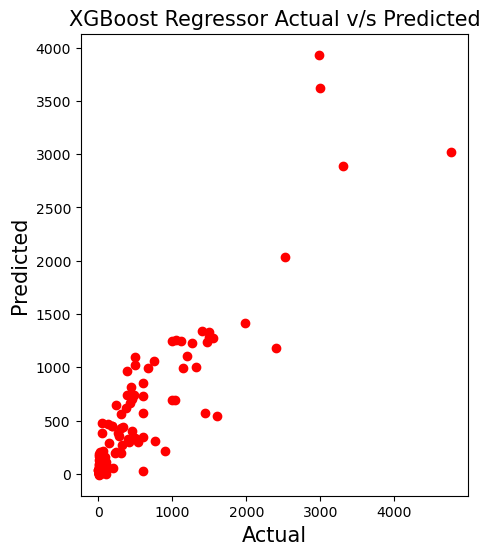

In [278]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_xg, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('XGBoost Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see most number of samples are following linear curve

In [279]:
print("r2_score on test data ", r2_score(y_test2, pred_xg) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_xg))

print("MSE ", mean_squared_error(y_test2, pred_xg))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_xg)))

r2_score on test data  83.78715943853517
MAE  141.5261651506311
MSE  77803.53382451403
RMSE  278.9328482350439


Observation:
            1. XGBoost Regressor model with kfold cross validation - 83.78%
            2. Random Forest Regressor model with kfold cross validation - 88.26%
            2. We can choose Random Forest Regressor model for hyper parameter tuning.

## HyperParameter Tuning for Random Forest Regressor model as its accuracy is better 88.26%

In [284]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [285]:
kf = KFold(n_splits = 5, shuffle = True)

In [286]:
grid_search = GridSearchCV(RFR, param_grid, scoring = 'r2', cv = kf)

In [287]:
grid_search.fit(x_train2, y_train2)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [288]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [290]:
RFR_hyper_model = grid_search.best_estimator_

## Retrain the model

In [291]:
RFR_hyper_model.fit(x_train2, y_train2)

RandomForestRegressor(max_depth=20, min_samples_leaf=2)

In [293]:
RFR_testing_acc = RFR_hyper_model.score(x_test2, y_test2)
RFR_testing_acc

0.8843369564208604

Observation:
            1. XGBoost Regressor model with kfold cross validation - 83.78%
            2. Random Forest Regressor model with kfold cross validation - 88.26%
            3. Random Forest Regressor model with hyper parameter tuning - 88.43%
            4. We can choose Random Forest Regressor model with hyper parameter tuning for prediction, 
               it has higher acc - 88.43%

## Saving the model

In [294]:
import pickle
filename = "Global_Power_Plant_Regression_Model.pkl"
pickle.dump(RFR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [295]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Global_Power_Plant_Regression_Model.pkl', 'rb'))

In [296]:
loaded_model1.score(x_test2, y_test2)

0.8843369564208604

In [297]:
prediction = loaded_model1.predict(x_test2)
prediction

array([3565.29801587,  424.88814667,   80.67505873,  666.77786222,
         17.13957667,   10.8438183 ,   10.6318558 ,  421.33469357,
        236.96650421,  268.00083529,   15.10936364,  675.07386148,
        223.08555   , 1266.67558905,   12.73980555,  935.5535619 ,
       1324.00046825,   39.629075  ,   42.72168949,  219.41024762,
        402.20367143,  102.43377857,   25.25858429,   55.89307024,
         99.4657883 ,   99.4657883 ,   22.06887513,    9.06277558,
          9.06277558,   11.0422381 ,   24.09890543,   41.18915794,
          7.79273079,   23.34545857,   29.94529762,   31.97163095,
         31.97163095,   39.84996273,   31.8261807 ,   20.15792597,
       1605.58496667,  110.98787778,  103.55899802,   41.57112002,
         37.13952381,   40.99945   ,   41.57112002,   41.57112002,
         41.57112002,   41.57112002,   30.31097917,   32.7327381 ,
          6.8792649 ,   28.06808393,   35.68690476,   41.88756429,
         39.71188571,   12.77116269,  706.01219286, 3220.04269

In [ ]:
Observation:
            1. This Global_Power_Plant_Regression_Model.pkl can be used to predict the 'capacity_mw' 
               electrical generating capacity in megawatts

In [ ]:
Observation:
            1. Linear Regression model with kfold cross validation - 49.49%
            2. Random Forest Regressor model with kfold cross validation - 88.26%
            3. Ridge Regression model with kfold cross validation - 49.49%
            4. XGBoost Regressor model with kfold cross validation - 83.78%
            5. Random Forest Regressor model with hyper parameter tuning - 88.43%
            5. Comparing the models - Random Forest Regressor model with hyper parameter tuning has 
                the higher accuracy 88.43% and also there is no overfitting of the model